## **Aufgabe 2 - Volumenstrommessung**

Die Frischluftversorgung einer raumlufttechnischen Anlage soll untersucht werden. Dazu muss der Volumenstrom $Q$ an einem Lüftungsgitter (Auslass der Frischluftleitung in den zu belüftenden Raum hinein) bestimmt werden. Zu diesem Zwecke wird zunächst die Luftgeschwindigkeit $u(x_i, y_j)$ an verschiedenen Punkten bzw. Stützstellen $(x_i, y_j)$ auf dem Lüftungsgitter gemessen. Aufbauend auf diesen Messungen wird der Volumenstrom durch die Approximation des Integrals

$$ Q = \int_A u \,\text{d}A = \int_{y_0}^{y_m} \int_{x_0}^{x_n} u(x,y) \, \text{d}x \, \text{d}y $$

bestimmt.

Das Lüftungsgitter hat eine Größe von 20 cm x 20 cm und es wurden in einer ersten Messung 5 x 5 Messpunkte aufgenommen. In einer zweiten Messung wurden dann 11 x 11 Messpunkte aufgenommen. Die Messdaten sind in den Dateien `geschwindigkeitsprofil_5x5.csv` und `geschwindigkeitsprofil_11x11.csv` im Ordner `Daten` gespeichert.

### **Teilaufgaben**

1. Implementieren Sie eine *Funktion* zur numerischen Berechnung von Integralen mit Hilfe der Trapezregel. **Hinweis:** Nutzen Sie dazu ***keine*** fertigen Integrationsfunktionen von Numpy oder Scipy!
2. Laden Sie die Daten aus den beiden bereitgestellten Dateien und visualisieren Sie die Geschwindigkeitsprofile in einem 2D-Plot. **Hinweis**: Nutzen Sie dazu zum Beispiel die Matplotlib Funktion [`tricontourf()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tricontourf.html).
3. Integrieren Sie den Volumenstrom $Q$ beider Messreihen mit Hilfe der Mittelpunktsregel. Wie groß ist die Abweichung des Volumenstroms zwischen den jeweiligen Gittern?

============================================================================================================================
### **Implementierung**

`numpy` verarbeitet numerische Daten, und `matplotlib.pyplot` erstellt die Visualisierungen, z. B. die Konturplots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Teilaufgabe 1: Implementierung der Trapezregel (Implementiert, aber nicht genutz)

Obwohl die Funktion spätere nicht genutzt wird, bleibt sie im Code, weil sie in der Teilaufgabe 1 gefordert wurde.

Die Funktion `trapezregel` berechnet den Volumenstrom `Q` mithilfe der Trapezregel. Dafür iteriert sie über jedes kleine Rechteck im Gitter, berechnet die Durchschnittsgeschwindigkeit an den vier Ecken und multipliziert sie mit der Rechtecksfläche. Alle Beiträge werden aufaddiert, bis `Q` fertig ist.

In [2]:
def trapezregel(x, y, u):
    Q = 0
    for i in range(1, len(x)):
        for j in range(1, len(y)):
            Q += 1/4 * (u[i-1, j] + u[i, j-1] + u[i, j] + u[i-1, j-1]) * (x[i] - x[i-1]) * (y[j] - y[j-1])
    return Q

#### Regel zur Volumenstromberechnung (Mittelpunktregel)

Die Funktion `mittelpunktregel` berechnet den Volumenstrom `Q`, indem sie für jedes Rechteck im Gitter die mittlere Geschwindigkeit `u_mittel` an den Ecken bestimmt und mit der Rechtecksfläche multipliziert. Die Beiträge aller Rechtecke werden aufaddiert, um `Q` zu erhalten.

In [3]:
def mittelpunktregel(x, y, u):
    Q = 0
    for i in range(1, len(x)):
        for j in range(1, len(y)):
            u_mittel = (u[i-1, j-1] + u[i, j-1] + u[i-1, j] + u[i, j]) / 4
            Q += u_mittel * (x[i] - x[i-1]) * (y[j] - y[j-1])
    return Q

#### Daten laden und Einheiten umrechnen

Die Daten aus den CSV-Dateien werden geladen und in die Variablen x, y und z aufgeteilt. Anschließend werden die Einheiten von Zentimetern in Meter umgerechnet, damit die Werte konsistent sind und für die Berechnungen korrekt genutzt werden können.

In [4]:
x_5x5, y_5x5, u_5x5 = np.genfromtxt("Daten/geschwindigkeitsprofil_5x5.csv", delimiter=",", unpack=True)
x_11x11, y_11x11, u_11x11 = np.genfromtxt("Daten/geschwindigkeitsprofil_11x11.csv", delimiter=",", unpack=True)

x_5x5 /= 100  # Umrechnung von cm nach m
y_5x5 /= 100
x_11x11 /= 100
y_11x11 /= 100

#### Teilaufgabe 2: Visualisierung des Geschwindigkeitsprofils für 5x5

Dieser Abschnitt erstellt einen Konturplot des Geschwindigkeitsprofils für das 5x5-Gitter. Die Funktion `tricontourf` interpoliert die Werte zwischen den Punkten, und die Farbskala (`colorbar`) zeigt die Geschwindigkeit an. Die Achsen sind beschriftet und der Plot hat einen Titel.

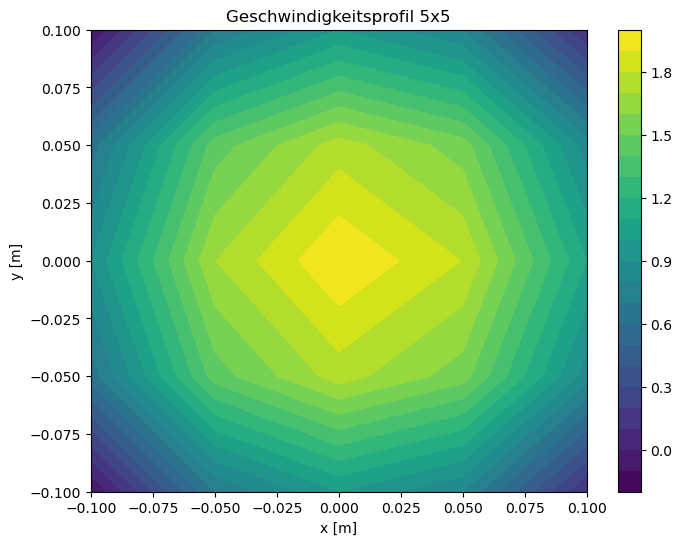

In [5]:
# Teilaufgabe 2: Visualisierung des Geschwindigkeitsprofils für 5x5
plt.figure(figsize=(8, 6))
plt.tricontourf(x_5x5, y_5x5, u_5x5, 25, cmap='viridis')
plt.colorbar()
plt.title('Geschwindigkeitsprofil 5x5')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()

#### Visualisierung des Geschwindigkeitsprofils für 11x11

Hier wird das Geschwindigkeitsprofil für das 11x11-Gitter visualisiert. Genau wie beim 5x5-Gitter erstellt `tricontourf` einen farbigen Konturplot, der die Geschwindigkeit zwischen den Punkten interpoliert. Die Farbskala zeigt die Werte, und Titel sowie Achsenbeschriftungen sorgen für Klarheit.

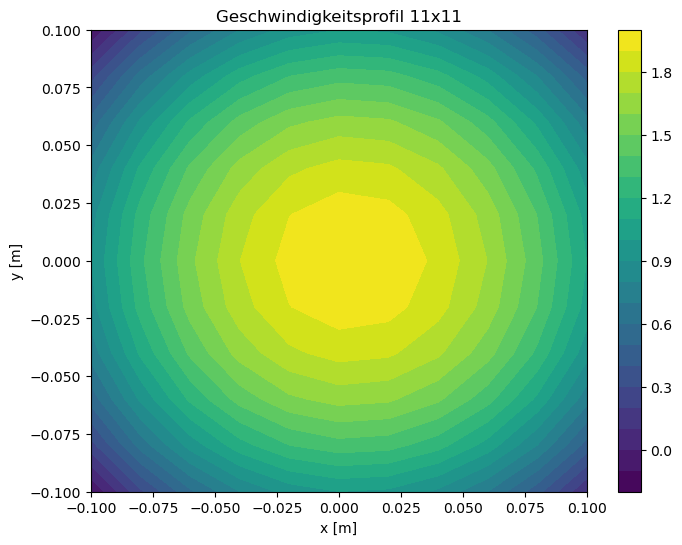

In [6]:
plt.figure(figsize=(8, 6))
plt.tricontourf(x_11x11, y_11x11, u_11x11, 25, cmap='viridis')
plt.colorbar()
plt.title('Geschwindigkeitsprofil 11x11')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()

#### Teilaufgabe 3: Daten reorganisieren und Volumenstrom berechnen

Hier werden die Geschwindigkeitsdaten u für die 5x5- und 11x11-Gitter in eine 2D-Matrix umgeformt. Dadurch passen die Werte u zu den x- und y-Koordinaten in der Gitterstruktur, was für die Berechnung des Volumenstroms notwendig ist.

In [7]:
u_2d_5x5 = u_5x5.reshape(len(np.unique(x_5x5)), len(np.unique(y_5x5)))
u_2d_11x11 = u_11x11.reshape(len(np.unique(x_11x11)), len(np.unique(y_11x11)))

#### Berechnung des Volumenstroms für 5x5 und 11x11 mit der Mittelpunktregel

Hier wird der Volumenstrom Q für die 5x5- und 11x11-Gitter berechnet. Die Funktion `mittelpunktregel` nutzt die eindeutigen x- und y-Werte sowie die umgeformten Geschwindigkeitsdaten u, um den gesamten Volumenstrom für jedes Gitter zu bestimmen.

In [8]:
Volumenstrom_5x5 = mittelpunktregel(np.unique(x_5x5), np.unique(y_5x5), u_2d_5x5)

Volumenstrom_11x11 = mittelpunktregel(np.unique(x_11x11), np.unique(y_11x11), u_2d_11x11)

#### Ergebnisse und Abweichung ausgeben

Dieser Abschnitt gibt die berechneten Volumenströme für das 5x5- und 11x11-Gitter aus. Die Werte werden in Kubikmetern pro Sekunde (`m³/s`) mit drei Dezimalstellen angezeigt.

In [9]:
print(f"Volumenstrom für 5x5 beträgt: {Volumenstrom_5x5:.3f} m³/s")
print(f"Volumenstrom für 11x11 beträgt: {Volumenstrom_11x11:.3f} m³/s")

Volumenstrom für 5x5 beträgt: 0.050 m³/s
Volumenstrom für 11x11 beträgt: 0.053 m³/s


#### Berechnung der Abweichung zwischen den Volumenströmen

Hier wird die absolute Abweichung zwischen den beiden berechneten Volumenströmen (für 5x5 und 11x11) ermittelt. Der Unterschied zeigt, wie stark die Ergebnisse der beiden Gitter aufgrund ihrer unterschiedlichen Auflösungen variieren. Der Wert wird in `m³/s` mit drei Dezimalstellen ausgegeben.

In [10]:
Abweichung = abs(Volumenstrom_5x5 - Volumenstrom_11x11)
print(f"Die Abweichung zwischen den Gittern beträgt: {Abweichung:.3f} m³/s")

Die Abweichung zwischen den Gittern beträgt: 0.003 m³/s
